<a href="https://colab.research.google.com/github/mmouadd/GdKI/blob/main/Aufgabe_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  !pip install tf-nightly

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import  models
from tensorflow.keras.models import Sequential
from IPython.display import Image

In [4]:
import pathlib
path_dataset_drive = "/content/drive/MyDrive/KI Projekt - Dataset/Dataset - Mask" 
dataset_dir = pathlib.Path(path_dataset_drive)

In [79]:
batch_size = 512
img_height = 180
img_width = 180

In [80]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
dataset_dir,
validation_split=0.2,
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
dataset_dir,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 3833 files belonging to 2 classes.
Using 3067 files for training.
Found 3833 files belonging to 2 classes.
Using 766 files for validation.


In [81]:
class_dataset = train_ds.class_names
print(class_dataset)

['with_mask', 'without_mask']


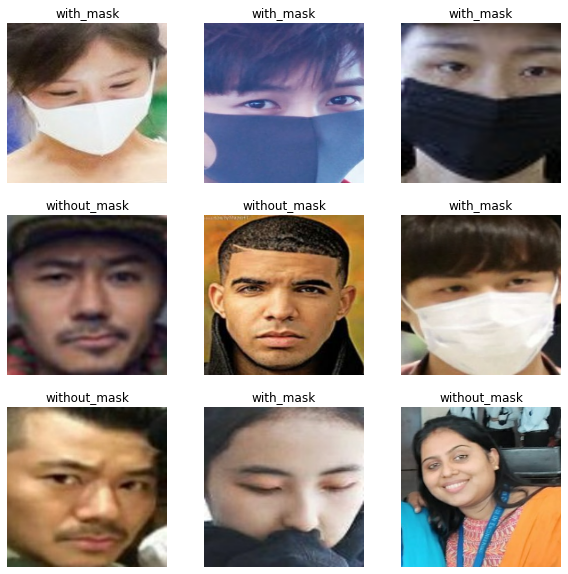

In [85]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
      for i in range(9):
          ax = plt.subplot(3, 3, i + 1)
          plt.imshow(images[i].numpy().astype("uint8"))
          plt.title(class_dataset[labels[i]])
          plt.axis("off")

In [86]:
normalization_layer =layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [87]:
num_classes = 2
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)])

In [88]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [89]:
history = model.fit(train_ds,validation_data=val_ds,epochs=50)

Epoch 1/50
6/6 [==============================] - 87s 13s/step - loss: 1.1371 - accuracy: 0.5034 - val_loss: 0.7300 - val_accuracy: 0.5104
Epoch 2/50
6/6 [==============================] - 80s 12s/step - loss: 0.6828 - accuracy: 0.5784 - val_loss: 0.6173 - val_accuracy: 0.6671
Epoch 3/50
6/6 [==============================] - 79s 12s/step - loss: 0.4820 - accuracy: 0.8357 - val_loss: 0.3271 - val_accuracy: 0.8721
Epoch 4/50
6/6 [==============================] - 79s 12s/step - loss: 0.2806 - accuracy: 0.8976 - val_loss: 0.2252 - val_accuracy: 0.9060
Epoch 5/50
6/6 [==============================] - 79s 12s/step - loss: 0.2165 - accuracy: 0.9247 - val_loss: 0.1837 - val_accuracy: 0.9282
Epoch 6/50
6/6 [==============================] - 79s 12s/step - loss: 0.1922 - accuracy: 0.9302 - val_loss: 0.1531 - val_accuracy: 0.9334
Epoch 7/50
6/6 [==============================] - 79s 12s/step - loss: 0.1636 - accuracy: 0.9439 - val_loss: 0.1611 - val_accuracy: 0.9360
Epoch 8/50
6/6 [===========

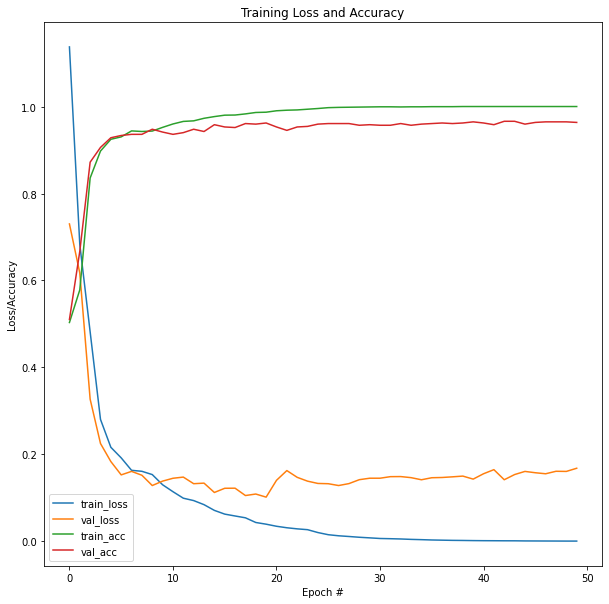

In [118]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(50)
plt.figure(figsize=(10, 10))
epochs = 50
N = epochs
plt.plot(np.arange(0,N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc='lower left')
plt.show()

In [92]:
import cv2 #opencv itself

import numpy as np # matrix manipulations

1/1 [==============================] - 0s 25ms/step
predection is for with_mask with a 100.00percent confidence.


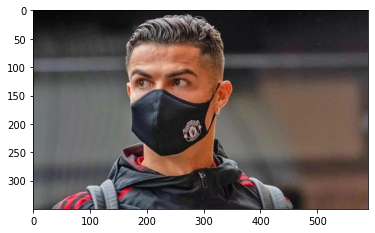

In [116]:
path="/content/drive/MyDrive/KI Projekt - Dataset/Cristiano-Mask.jpg"
base_image = cv2.imread(path)
img=keras.preprocessing.image.load_img(
    path,target_size=(img_height,img_width)
)
img_array=keras.preprocessing.image.img_to_array(img)
img_array=tf.expand_dims(img_array,0)
predictions=model.predict(img_array)
score=tf.nn.softmax(predictions[0])
grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(base_image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))
print("predection is for {} with a {:.2f}percent confidence.".format(class_dataset[np.argmax(score)],100*np.max(score)))